In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
data_dir = './Datasets/'
power_plants = pd.read_csv(data_dir + 'power_plants.csv')
pd.options.display.max_columns = None

In [13]:
power_plants

,longitude,latitude,plant_name,utility_name,sector_name,city,county,state_name,primary_source,total_power,source_description,tech_description,state_code
0,-87.356823,33.458665,Bankhead Dam,Alabama Power Co,Electric Utility,Northport,as,Alabama,hydroelectric,56.0,g,Conventional Hydroelectric,NaN
1,-88.010300,31.006900,Barry,Alabama Power Co,Electric Utility,Bucks,Mobile,Alabama,coal,2160.5,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,NaN
2,-86.283056,32.583889,Walter Bouldin Dam,Alabama Power Co,Electric Utility,Wetumpka,Elmore,Alabama,hydroelectric,225.9,Hydroelectric = 225.9 MW,Conventional Hydroelectric,NaN
3,-85.970800,34.012800,Gadsden,Alabama Power Co,Electric Utility,Gadsden,Etowah,Alabama,natural gas,130.0,Natural Gas = 130 MW,Natural Gas Steam Turbine,NaN
4,-87.196486,33.644344,Gorgas,Alabama Power Co,Electric Utility,Parrish,Walker,Alabama,coal,1034.0,Coal = 1034 MW,Conventional Steam Coal,NaN
5,-106.375000,31.756900,Copper,El Paso Electric Co,Electric Utility,El Paso,El Paso,Texas,natural gas,62.0,Natural Gas = 62 MW,Natural Gas Fired Combustion Turbine,NaN
6,-87.781100,32.601700,Greene County,Alabama Power Co,Electric Utility,Demopolis,Greene,Alabama,natural gas,1237.0,"Coal = 497 MW, Natural Gas = 740 MW",Conventional Steam Coal; Natural Gas Fired Com...,NaN
7,-86.052400,33.784500,H Neely Henry Dam,Alabama Power Co,Electric Utility,Ohatchee,Calhoun,Alabama,hydroelectric,70.0,Hydroelectric = 70 MW,Conventional Hydroelectric,NaN
8,-87.449500,33.255300,Holt Dam,Alabama Power Co,Electric Utility,Tuscaloosa,Tuscaloosa,Alabama,hydroelectric,45.0,Hydroelectric = 45 MW,Conventional Hydroelectric,NaN
9,-86.254800,32.618900,Jordan Dam,Alabama Power Co,Electric Utility,Wetumpka,Elmore,Alabama,hydroelectric,100.0,Hydroelectric = 100 MW,Conventional Hydroelectric,NaN


In [9]:
state_code_dic = {'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Federated States of Micronesia': 'FM',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Marshall Islands': 'MH',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Palau': 'PW',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virgin Islands': 'VI',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY'}

In [12]:
power_plants['state_code'] = np.NAN

In [14]:
power_plants['primary_source'].unique()

array(['hydroelectric', 'coal', 'natural gas', 'nuclear', 'petroleum',
       'pumped storage', 'geothermal', 'biomass', 'wind', 'other',
       'solar', nan], dtype=object)

In [30]:
temp_state = pd.read_csv(data_dir + 'land_temp_by_state.csv')
pd.options.display.max_columns = None
temp_state

,dt,avg_temperature,avg_temperature_uncertainty,state_name
0,2001-01-01,5.358,0.161,Alabama
1,2001-02-01,11.583,0.177,Alabama
2,2001-03-01,11.185,0.135,Alabama
3,2001-04-01,18.517,0.129,Alabama
4,2001-05-01,21.985,0.158,Alabama
5,2001-06-01,24.904,0.196,Alabama
6,2001-07-01,27.066,0.242,Alabama
7,2001-08-01,26.443,0.182,Alabama
8,2001-09-01,22.766,0.233,Alabama
9,2001-10-01,16.343,0.146,Alabama


In [160]:
state_code = pd.DataFrame({'state_name':list(state_code_dic.keys()),'state_code':list(state_code_dic.values())})
state_code

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR
5,California,CA
6,Colorado,CO
7,Connecticut,CT
8,Delaware,DE
9,District of Columbia,DC


In [43]:
temp_state= temp_state.merge(state_code,on='state_name')

In [45]:
temp_state['dt'] = pd.to_datetime(temp_state['dt'])

In [55]:
temp_state.set_index('dt',inplace=True)

In [57]:
temp_state

,avg_temperature,avg_temperature_uncertainty,state_name,state_code
dt,,,,
2001-01-01,5.358,0.161,Alabama,AL
2001-02-01,11.583,0.177,Alabama,AL
2001-03-01,11.185,0.135,Alabama,AL
2001-04-01,18.517,0.129,Alabama,AL
2001-05-01,21.985,0.158,Alabama,AL
2001-06-01,24.904,0.196,Alabama,AL
2001-07-01,27.066,0.242,Alabama,AL
2001-08-01,26.443,0.182,Alabama,AL
2001-09-01,22.766,0.233,Alabama,AL


In [69]:
temp_state.groupby([temp_state.index.map(lambda x: x.month),'state_code',temp_state.index.map(lambda x: x.year)]).mean()

avg_temperature  avg_temperature_uncertainty
dt state_code dt                                                
1  AK         2001          -11.987                        0.315
              2002          -15.633                        0.348
              2003          -15.026                        0.378
              2004          -20.403                        0.416
              2005          -16.645                        0.364
              2006          -22.745                        0.532
              2007          -17.576                        0.323
              2008          -20.132                        0.393
              2009          -20.473                        0.264
              2010          -19.603                        0.427
              2011          -16.354                        0.305
              2012          -27.039                        0.440
              2013          -15.329                        0.495
   AL         2001            5.358                        0.161
              2002            8.629                        0.200
              2003            4.840                        0.083
              2004            7.003                        0.235
              2005            9.756                        0.057
              2006           10.878                        0.269
              2007            8.378                        0.200
              2008            6.378                        0.251
              2009            7.535                        0.218
              2010            4.617                        0.172
              2011            5.297                        0.242
              2012           10.290                        0.303
              2013           10.284                        0.241
   AR         2001            2.883                        0.135
              2002            5.968                        0.208
              2003            2.754                        0.195
              2004            5.072                        0.178
...                             ...                          ...
12 WI         2007           -7.549                        0.154
              2008           -9.938                        0.142
              2009           -7.082                        0.217
              2010           -7.877                        0.338
              2011           -2.924                        0.341
              2012           -3.367                        0.301
   WV         2001            4.724                        0.103
              2002            0.614                        0.188
              2003            0.929                        0.215
              2004            1.740                        0.154
              2005           -0.702                        0.261
              2006            4.542                        0.268
              2007            3.088                        0.253
              2008            1.995                        0.315
              2009            0.373                        0.176
              2010           -3.055                        0.280
              2011            3.918                        0.310
              2012            4.280                        0.240
   WY         2001           -5.770                        0.367
              2002           -3.830                        0.358
              2003           -3.764                        0.309
              2004           -3.341                        0.185
              2005           -6.051                        0.274
              2006           -4.425                        0.257
              2007           -7.608                        0.186
              2008           -7.298                        0.158
              2009           -9.593                        0.210
              2010           -4.371                        0.259
              2011           -5.806                    

In [90]:
asthma = pd.read_csv('./R code/asthma_by_state_00_16.csv')
asthma

,Unnamed: 0,state_data,size_data,rate_data,year
0,1,U.S. Total**,496223,13.4,2011
1,2,AL,7647,11.9,2011
2,3,AK,3523,14.0,2011
3,4,AZ,6297,14.1,2011
4,5,AR,4724,14.2,2011
5,6,CA,17990,14.0,2011
6,7,CO,13567,12.9,2011
7,8,CT,6802,14.8,2011
8,9,DE,4769,14.0,2011
9,10,DC,4549,15.8,2011


In [91]:
asthma.drop(['Unnamed: 0'],axis=1,inplace=True)

In [92]:
asthma.groupby('state_data').size()

state_data
AK              17
AL              17
AR              17
AZ              17
CA              17
CO              17
CT              17
DC              17
DE              17
FL              17
GA              17
HI              16
IA              17
ID              17
IL              17
IN              17
KS              17
KY              17
LA              17
MA              17
MD              17
ME              17
MI              17
MN              17
MO              17
MS              17
MT              17
NC              17
ND              17
NE              17
NH              17
NJ              17
NM              17
NV              17
NY              17
OH              17
OK              17
OR              17
PA              17
RI              17
SC              17
SD              17
TN              17
TX              17
Territories      1
U.S. Total**     9
UT              17
VA              17
VT              17
WA              17
WI              17
WV              17
W

In [101]:
asthma = asthma.drop(asthma[asthma['state_data'].isin(['Territories','U.S. Total**','HI'])].index)

In [102]:
asthma.sort_values('year',inplace=True)

In [103]:
asthma.to_csv('asthma.csv')

In [104]:
asthma

,state_data,size_data,rate_data,year
798,MS,2177,9.8,2000
774,AL,2238,9.1,2000
775,AK,2079,11.3,2000
776,AZ,2677,11.1,2000
777,AR,3003,9.9,2000
778,CA,3905,11.5,2000
779,CO,3055,9.5,2000
780,CT,3909,10.8,2000
781,DE,2756,10.4,2000
782,DC,1713,11.0,2000


In [152]:
state_area = pd.read_csv('./R code/state_area.csv')
state_area

,Unnamed: 0,state_name,area_data
0,1,Alaska,1723337
1,2,Texas,695662
2,3,California,423972
3,4,Montana,380831
4,5,New Mexico,314917
5,6,Arizona,295234
6,7,Nevada,286380
7,8,Colorado,269601
8,9,Oregon,254799
9,10,Wyoming,253335


In [162]:
state_area.drop(['Unnamed: 0'],axis=1,inplace=True)

In [155]:
state_area.merge(state_code,on='state_name')

,Unnamed: 0,state_name,area_data,state_code


In [125]:
state_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
state_name    59 non-null object
state_code    59 non-null object
dtypes: object(2)
memory usage: 1.0+ KB


In [164]:
state_area.to_csv('state_area_final.csv')

In [153]:
state_area['state_name'] = state_area['state_name'].apply(lambda x: x.replace(u'\xa0', u''))

In [163]:
state_area.merge(state_code,on='state_name')

,state_name,area_data,state_code
0,Alaska,1723337,AK
1,Texas,695662,TX
2,California,423972,CA
3,Montana,380831,MT
4,New Mexico,314917,NM
5,Arizona,295234,AZ
6,Nevada,286380,NV
7,Colorado,269601,CO
8,Oregon,254799,OR
9,Wyoming,253335,WY


In [166]:
air = pd.read_csv('general_air.csv')
air

,State,Year,TSO4,TNH4,CA,MG,NA,K,NSO4,NHNO3,WSO2,total_SO2,total_NO3,flow_volume,long0,long1,long2,long3,long4,lat0,lat1,lat2,lat3,air_quality,Max AQI,Median AQI
0,AK,2000,0.310392,0.075531,0.020064,0.008681,0.040076,0.027558,0.075671,0.087864,0.280607,0.331081,0.161998,29.409973,1,0,0,0,0,0,0,0,1,1,114.166667,22.666667
1,AK,2001,0.334893,0.063567,0.032252,0.010044,0.046813,0.012278,0.048276,0.084140,0.341715,0.373904,0.146370,29.328683,1,0,0,0,0,0,0,0,1,1,81.500000,19.625000
2,AK,2002,0.362048,0.075749,0.032023,0.009671,0.035540,0.017794,0.128716,0.137574,0.336979,0.422840,0.211129,29.153419,1,0,0,0,0,0,0,0,1,1,90.714286,21.000000
3,AK,2003,0.376138,0.060945,0.027238,0.010465,0.036102,0.013341,0.131812,0.104120,0.345822,0.433743,0.163408,29.273737,1,0,0,0,0,0,0,0,1,1,141.285714,17.857143
4,AK,2004,0.330246,0.105943,0.042306,0.012867,0.040415,0.027002,0.156815,0.098276,0.302558,0.407165,0.202651,29.437697,1,0,0,0,0,0,0,0,1,1,160.100000,15.300000
5,AK,2005,0.342985,0.081660,0.022083,0.009121,0.032112,0.020679,0.150083,0.100015,0.387423,0.487527,0.180088,30.112294,1,0,0,0,0,0,0,0,1,1,87.555556,16.222222
6,AK,2006,0.485529,0.059476,0.023673,0.011659,0.043459,0.014665,0.124339,0.074692,0.562700,0.645629,0.132980,29.693212,1,0,0,0,0,0,0,0,1,1,95.000000,17.625000
7,AK,2007,0.377025,0.063406,0.021256,0.009550,0.032963,0.013421,0.189269,0.080100,0.365529,0.491765,0.142227,29.864865,1,0,0,0,0,0,0,0,1,1,89.875000,16.875000
8,AK,2008,0.439479,0.070674,0.022702,0.012358,0.052015,0.015598,0.162849,0.070832,0.385996,0.494615,0.140375,29.125396,1,0,0,0,0,0,0,0,1,1,83.888889,14.222222
9,AK,2009,0.583071,0.064612,0.030183,0.012613,0.052840,0.023925,0.142233,0.090362,0.343654,0.438521,0.153542,29.815148,1,0,0,0,0,0,0,0,1,1,118.000000,18.000000


In [176]:
#top50_df.drop(columns=['matchType'], inplace=True)

def train_test_split(df, test_size=0.3):
    import random
    ids = df.index.unique().tolist()
    train_size = int(len(ids) * (1 - test_size))
    train_match_ids = random.sample(ids, train_size)

    train = df[df.index.isin(train_match_ids)]
    test = df[~df.index.isin(train_match_ids)]

    return train, test

In [177]:
list(air.columns)[3:11]

['TNH4', 'CA', 'MG', 'NA', 'K', 'NSO4', 'NHNO3', 'WSO2']

[20]	valid_0's l1: 2.90453	valid_0's l2: 13.9549
[40]	valid_0's l1: 2.70893	valid_0's l2: 12.2309
[60]	valid_0's l1: 2.62207	valid_0's l2: 11.4899
[80]	valid_0's l1: 2.53435	valid_0's l2: 10.8626
[100]	valid_0's l1: 2.50506	valid_0's l2: 10.6769


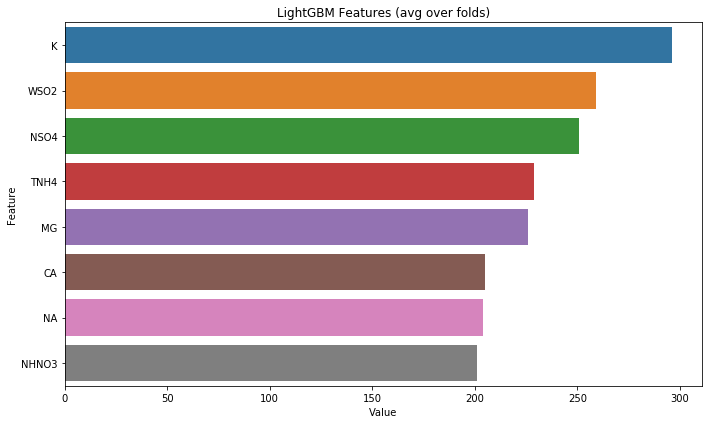

In [200]:
target = 'Median AQI'
#cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType', target]
cols_to_fit = list(air.columns)[3:11]
train, val = train_test_split(air)

from lightgbm import LGBMRegressor

params = {
    'n_estimators': 100,
    'learning_rate': 0.1, 
    'num_leaves': 20,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,
}

model = LGBMRegressor(**params)
model.fit(
    train[cols_to_fit], train[target],
    eval_set=[(val[cols_to_fit], val[target])],
    eval_metric='mse',
    verbose=20,
)

feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [202]:
feature_importance_2 = feature_importance

In [211]:
feature_importance_2.sort_values('Value',ascending=False,inplace=True)

In [216]:
gas_important = list(feature_importance_2['Feature'][0:5])

In [217]:
air

,State,Year,TSO4,TNH4,CA,MG,NA,K,NSO4,NHNO3,WSO2,total_SO2,total_NO3,flow_volume,long0,long1,long2,long3,long4,lat0,lat1,lat2,lat3,air_quality,Max AQI,Median AQI
0,AK,2000,0.310392,0.075531,0.020064,0.008681,0.040076,0.027558,0.075671,0.087864,0.280607,0.331081,0.161998,29.409973,1,0,0,0,0,0,0,0,1,1,114.166667,22.666667
1,AK,2001,0.334893,0.063567,0.032252,0.010044,0.046813,0.012278,0.048276,0.084140,0.341715,0.373904,0.146370,29.328683,1,0,0,0,0,0,0,0,1,1,81.500000,19.625000
2,AK,2002,0.362048,0.075749,0.032023,0.009671,0.035540,0.017794,0.128716,0.137574,0.336979,0.422840,0.211129,29.153419,1,0,0,0,0,0,0,0,1,1,90.714286,21.000000
3,AK,2003,0.376138,0.060945,0.027238,0.010465,0.036102,0.013341,0.131812,0.104120,0.345822,0.433743,0.163408,29.273737,1,0,0,0,0,0,0,0,1,1,141.285714,17.857143
4,AK,2004,0.330246,0.105943,0.042306,0.012867,0.040415,0.027002,0.156815,0.098276,0.302558,0.407165,0.202651,29.437697,1,0,0,0,0,0,0,0,1,1,160.100000,15.300000
5,AK,2005,0.342985,0.081660,0.022083,0.009121,0.032112,0.020679,0.150083,0.100015,0.387423,0.487527,0.180088,30.112294,1,0,0,0,0,0,0,0,1,1,87.555556,16.222222
6,AK,2006,0.485529,0.059476,0.023673,0.011659,0.043459,0.014665,0.124339,0.074692,0.562700,0.645629,0.132980,29.693212,1,0,0,0,0,0,0,0,1,1,95.000000,17.625000
7,AK,2007,0.377025,0.063406,0.021256,0.009550,0.032963,0.013421,0.189269,0.080100,0.365529,0.491765,0.142227,29.864865,1,0,0,0,0,0,0,0,1,1,89.875000,16.875000
8,AK,2008,0.439479,0.070674,0.022702,0.012358,0.052015,0.015598,0.162849,0.070832,0.385996,0.494615,0.140375,29.125396,1,0,0,0,0,0,0,0,1,1,83.888889,14.222222
9,AK,2009,0.583071,0.064612,0.030183,0.012613,0.052840,0.023925,0.142233,0.090362,0.343654,0.438521,0.153542,29.815148,1,0,0,0,0,0,0,0,1,1,118.000000,18.000000


In [225]:
air_summary = air.groupby('air_quality').mean().reset_index()

In [226]:
air_summary

,air_quality,Year,TSO4,TNH4,CA,MG,NA,K,NSO4,NHNO3,WSO2,total_SO2,total_NO3,flow_volume,long0,long1,long2,long3,long4,lat0,lat1,lat2,lat3,Max AQI,Median AQI
0,0,2004.802260,3.748502,1.126643,0.271637,0.051536,0.139437,0.073144,0.836866,1.667260,4.643942,5.202639,2.767617,14.961619,0.000000,0.000000,0.000000,0.587571,0.412429,0.000000,0.581921,0.418079,0.000000,145.615436,41.664813
1,1,2010.093750,1.307864,0.892941,0.614812,0.044883,0.104749,0.059418,0.187549,0.517829,0.543384,0.668477,1.402536,29.647098,0.296875,0.000000,0.234375,0.468750,0.000000,0.234375,0.265625,0.203125,0.296875,107.808663,29.463659
2,2,2006.355932,2.773632,0.692554,0.257411,0.129209,0.868343,0.097251,0.424375,0.832301,1.404156,1.687196,1.511324,20.405774,0.000000,0.033898,0.101695,0.762712,0.101695,0.474576,0.423729,0.101695,0.000000,126.714404,38.452869
3,3,2002.000000,2.037556,0.097944,0.039677,0.057436,0.449715,0.034797,0.721538,0.102868,28.200727,28.681995,0.199174,16.321903,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,125.216667,20.666667
4,4,2009.785047,0.683970,0.331686,0.178139,0.028976,0.071269,0.040896,0.113343,0.508190,0.350590,0.426190,0.831789,32.840028,0.000000,0.056075,0.789720,0.098131,0.056075,0.000000,0.457944,0.542056,0.000000,140.183011,34.933684
5,5,2012.345794,1.707581,0.755297,0.210112,0.043786,0.155762,0.071801,0.458065,0.741573,0.779001,1.084614,1.485123,14.806427,0.000000,0.000000,0.004673,0.616822,0.378505,0.000000,0.532710,0.467290,0.000000,116.490725,37.826527


In [229]:
graph_data = air_summary[gas_important].loc[air_summary['air_quality'].isin([0,3])]

In [230]:
graph_data

,K,WSO2,NSO4,TNH4,MG
0,0.073144,4.643942,0.836866,1.126643,0.051536
3,0.034797,28.200727,0.721538,0.097944,0.057436


In [232]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='jhuo831alex', api_key='hIejbAalxmsP4IlYnSaS')


In [267]:
group0 = np.array(graph_data.iloc[0])
group0

array([0.07314443, 4.64394205, 0.83686592, 1.12664301, 0.05153585])

In [268]:
group1 = np.array(graph_data.iloc[1])
group1

array([ 0.03479686, 28.20072683,  0.7215383 ,  0.09794391,  0.057436  ])

In [269]:
ratios = 3/(group0+group1)
ratios

array([27.79288665,  0.09133902,  1.92504612,  2.44980568, 27.53004462])

In [271]:
group0_norm = group0 * ratios

In [272]:
group1_norm = group1*ratios

In [279]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Scatterpolar(
      r = group0_norm,
      theta = list(graph_data.columns),
      fill = 'toself',
      name = 'Worst Air Quality'
    ),
    go.Scatterpolar(
      r = group1_norm,
      theta = list(graph_data.columns),
      fill = 'toself',
      name = 'Best Air Quality'
    )
]

layout = go.Layout(
  title='Air Quality explained by Air Components',
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 3]
    )
  ),
  showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [280]:
consumption_per_area = pd.read_csv('consumption_per_area.csv')

In [292]:
median_summary = consumption_per_area.groupby('state_code').median()

In [293]:
mean_summary = consumption_per_area.groupby('state_code').mean()

In [297]:
diff = np.array(median_summary['Non-renewable Consumption per Area']) - np.array(mean_summary['Non-renewable Consumption per Area'])

In [301]:
mean_summary['diff'] = np.abs(diff)

In [305]:
mean_summary.sort_values('diff',ascending=False,inplace=True)

In [312]:
mean_summary

,Unnamed: 0,year,Renewable Consumption(BTU),Non-renewable Consumption(BTU),area_data,Renewable Consumption per Area,Non-renewable Consumption per Area,diff
state_code,,,,,,,,
DC,127,2008,1033.764706,1.853939e+05,177,5.840479,1047.423064,14.158857
CT,110,2008,38813.352941,7.608254e+05,14357,2.703445,52.993338,1.523602
NJ,535,2008,56956.705882,2.388263e+06,22591,2.521212,105.717443,1.371619
DE,144,2008,4916.235294,2.794290e+05,6446,0.762680,43.349209,0.874186
MA,331,2008,66145.588235,1.385023e+06,27336,2.419724,50.666634,0.793720
HI,195,2008,19237.588235,2.720038e+05,28313,0.679461,9.607027,0.499691
TX,739,2008,349033.411765,1.185127e+07,695662,0.501728,17.035962,0.423295
VA,773,2008,133064.882353,2.316330e+06,110787,1.201088,20.907963,0.400078
PA,654,2008,156441.411765,3.697331e+06,119280,1.311548,30.997077,0.338780


In [310]:
top3_change_state = list(mean_summary.index[0:3])

In [311]:
top3_change_state

['DC', 'CT', 'NJ']

In [454]:
dc = consumption_per_area.loc[consumption_per_area['state_code'] == 'WY']

In [455]:
dc

,Unnamed: 0,year,state_name,state_code,Renewable Consumption(BTU),unit,Non-renewable Consumption(BTU),area_data,Renewable Consumption per Area,Non-renewable Consumption per Area
850,850,2000,Wyoming,WY,15011.0,Billion Btu,413098.0,253335,0.059254,1.630639
851,851,2001,Wyoming,WY,14656.0,Billion Btu,423837.0,253335,0.057852,1.673030
852,852,2002,Wyoming,WY,12275.0,Billion Btu,426551.0,253335,0.048454,1.683743
853,853,2003,Wyoming,WY,11635.0,Billion Btu,449744.0,253335,0.045927,1.775294
854,854,2004,Wyoming,WY,14033.0,Billion Btu,436739.0,253335,0.055393,1.723958
855,855,2005,Wyoming,WY,19272.0,Billion Btu,436832.0,253335,0.076073,1.724325
856,856,2006,Wyoming,WY,19517.0,Billion Btu,460922.0,253335,0.077040,1.819417
857,857,2007,Wyoming,WY,18888.0,Billion Btu,504821.0,253335,0.074557,1.992701
858,858,2008,Wyoming,WY,22412.0,Billion Btu,516113.0,253335,0.088468,2.037275
859,859,2009,Wyoming,WY,34967.0,Billion Btu,489313.0,253335,0.138027,1.931486


In [456]:
from sklearn import preprocessing

x = dc[['Non-renewable Consumption per Area']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.Series(x_scaled.ravel())

In [457]:
df

0     0.000000
1     0.104247
2     0.130593
3     0.355735
4     0.229491
5     0.230394
6     0.464243
7     0.890385
8     1.000000
9     0.739844
10    0.801456
11    0.807504
12    0.804825
13    0.704596
14    0.668359
15    0.413862
16    0.338524
dtype: float64

In [458]:
asthma

,state_data,size_data,rate_data,year
798,MS,2177,9.8,2000
774,AL,2238,9.1,2000
775,AK,2079,11.3,2000
776,AZ,2677,11.1,2000
777,AR,3003,9.9,2000
778,CA,3905,11.5,2000
779,CO,3055,9.5,2000
780,CT,3909,10.8,2000
781,DE,2756,10.4,2000
782,DC,1713,11.0,2000


In [459]:
asthma_dc = asthma.loc[asthma['state_data'] == 'WY']
asthma_dc

,state_data,size_data,rate_data,year
824,WY,2385,11.8,2000
518,WY,3038,11.6,2001
569,WY,3541,11.1,2002
620,WY,3999,11.2,2003
670,WY,4163,12.7,2004
722,WY,4995,12.6,2005
773,WY,4980,13.3,2006
875,WY,"6,153",12.5,2007
415,WY,7986,14.0,2008
467,WY,6043,13.5,2009


In [460]:
x = asthma_dc[['rate_data']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_asthma = pd.Series(x_scaled.ravel())

Text(0.5,1,'Change of Asthma Rate and Non-Renewable Energy Consumption Year 2000-2016 in Wyoming')

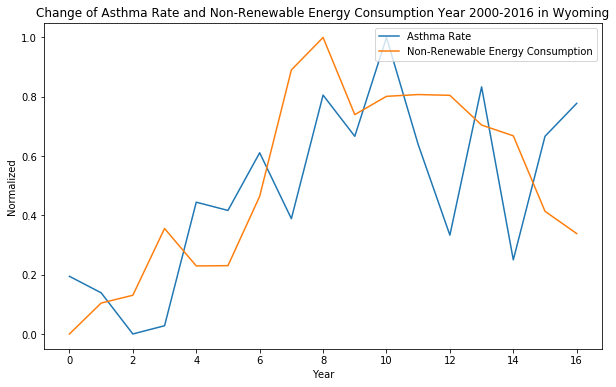

In [461]:
plt.figure(figsize=(10, 6))
plt.plot((df_asthma))
plt.plot(df)
plt.legend(['Asthma Rate', 'Non-Renewable Energy Consumption'], loc='upper right')
plt.xlabel('Year')
plt.ylabel('Normalized')
plt.title('Change of Asthma Rate and Non-Renewable Energy Consumption Year 2000-2016 in Wyoming')

Text(0.5,1,'Change of Asthma Rate and Non-Renewable Energy Consumption in Wyoming: lag by 2 years')

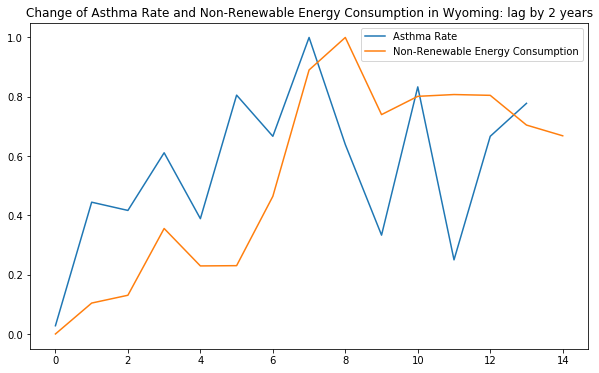

In [464]:
plt.figure(figsize=(10, 6))
plt.plot(df_asthma.values[3:])
plt.plot(df.values[:15])
plt.legend(['Asthma Rate', 'Non-Renewable Energy Consumption'], loc='upper right')
plt.title('Change of Asthma Rate and Non-Renewable Energy Consumption in Wyoming: lag by 2 years')

Text(0.5,1,'Change of Asthma Rate and Non-Renewable Energy Consumption Year 2000-2016 in Nevada')

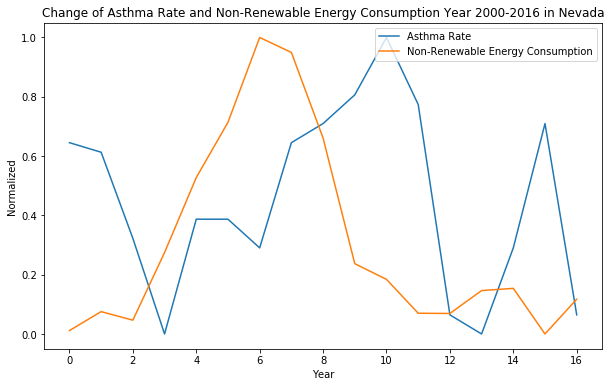

In [465]:
dc = consumption_per_area.loc[consumption_per_area['state_code'] == 'NV']
x = dc[['Non-renewable Consumption per Area']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.Series(x_scaled.ravel())
asthma_dc = asthma.loc[asthma['state_data'] == 'NV']
asthma_dc
x = asthma_dc[['rate_data']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_asthma = pd.Series(x_scaled.ravel())
plt.figure(figsize=(10, 6))
plt.plot(df_asthma)
plt.plot(df)
plt.legend(['Asthma Rate', 'Non-Renewable Energy Consumption'], loc='upper right')
plt.xlabel('Year')
plt.ylabel('Normalized')
plt.title('Change of Asthma Rate and Non-Renewable Energy Consumption Year 2000-2016 in Nevada')

Text(0.5,1,'Change of Asthma Rate and Non-Renewable Energy Consumption in Nevada: lag by 3 years')

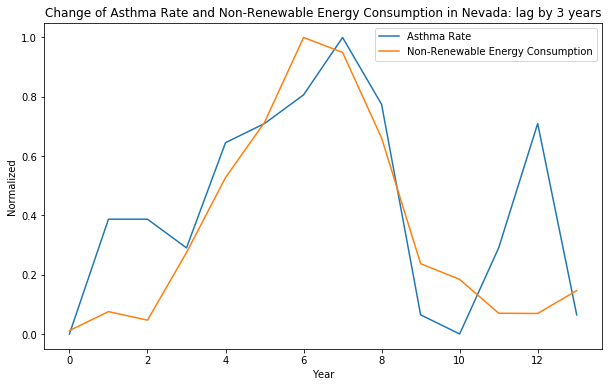

In [466]:
plt.figure(figsize=(10, 6))
plt.plot(df_asthma.values[3:])
plt.plot(df.values[:14])
plt.legend(['Asthma Rate', 'Non-Renewable Energy Consumption'], loc='upper right')
plt.xlabel('Year')
plt.ylabel('Normalized')
plt.title('Change of Asthma Rate and Non-Renewable Energy Consumption in Nevada: lag by 3 years')